In [10]:
file_path = './height-weight.csv'

# import DataFrame from pandas package so that we can work with this tabular data
import pandas as pd
from pandas import DataFrame as df

data_frame = pd.read_csv(file_path, sep='\t')

# now that we have a DataFrame lets peek into the data and see how it looks
data_frame.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [11]:
data_frame['height'] = data_frame['Height(Inches)'].map(lambda inches: round(inches * 0.0833333, 2))
data_frame.head()

,Index,Height(Inches),Weight(Pounds),height
0,1,65.78331,112.9925,5.48
1,2,71.51521,136.4873,5.96
2,3,69.39874,153.0269,5.78
3,4,68.21660,142.3354,5.68
4,5,67.78781,144.2971,5.65


In [12]:
data_frame['weight'] = data_frame['Weight(Pounds)'].map(lambda pounds: round(pounds * 0.453592, 2))
data_frame.head()

,Index,Height(Inches),Weight(Pounds),height,weight
0,1,65.78331,112.9925,5.48,51.25
1,2,71.51521,136.4873,5.96,61.91
2,3,69.39874,153.0269,5.78,69.41
3,4,68.21660,142.3354,5.68,64.56
4,5,67.78781,144.2971,5.65,65.45


In [13]:
df = data_frame[['height', 'weight']]
df.head()

,height,weight
0,5.48,51.25
1,5.96,61.91
2,5.78,69.41
3,5.68,64.56
4,5.65,65.45


In [14]:
len(df.index)

25000

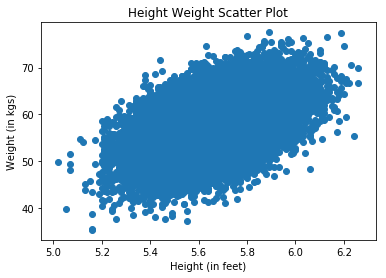

In [15]:
# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['height'], df['weight'])
plt.title('Height Weight Scatter Plot')
plt.xlabel('Height (in feet)')
plt.ylabel('Weight (in kgs)')
plt.show()

In [16]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['height'], df['weight'])

In [17]:
r_value ** 2

0.25286289315595528

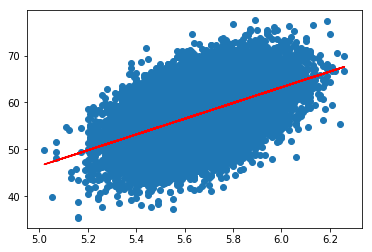

In [18]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(df['height'])

plt.scatter(df['height'], df['weight'])
plt.plot(df['height'], fitLine, c='r')
plt.show()

In [22]:
predict(5.6)

56.533451155843935

In [20]:
predict(4)

29.679812076991297